In [1]:
import pandas as pd
import numpy as np
from pysr import pysr, best
from sklearn import preprocessing

In [2]:
import matplotlib.pylab as plt

In [3]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
import math

In [5]:
# !pip install pysr

In [6]:
data = pd.read_csv('train_sample.csv')

In [7]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [8]:
data.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')

In [9]:
# Class count
count_class_0, count_class_1 = data['is_attributed'].value_counts()

# Divide by class
df_class_0 = data[data['is_attributed'] == 0]
df_class_1 = data[data['is_attributed'] == 1]

Random over-sampling:
1    99773
0    99773
Name: is_attributed, dtype: int64


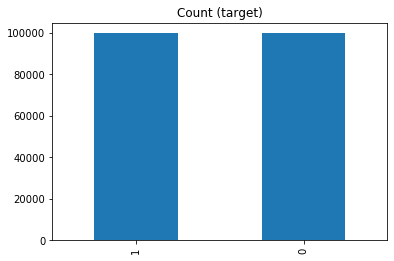

In [10]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over['is_attributed'].value_counts())

df_test_over['is_attributed'].value_counts().plot(kind='bar', title='Count (target)');

In [11]:
keep_clmns = ['ip', 'app', 'device', 'channel']
X = df_test_over[keep_clmns]

keep_clmns = ['is_attributed']
Y = df_test_over[keep_clmns]

In [12]:
X.head()

,ip,app,device,channel
0,87540,12,1,497
1,105560,25,1,259
2,101424,12,1,212
3,94584,13,1,477
4,68413,12,1,178


In [13]:
Y.head()

,is_attributed
0,0
1,0
2,0
3,0
4,0


In [14]:
def normalize_df(df):
    
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    return df

X_nor = normalize_df(X)
Y_nor = normalize_df(Y)

In [15]:
X_nor.head()

,0,1,2,3
0,0.239977,0.020000,0.000259,0.997980
1,0.289381,0.043636,0.000259,0.517172
2,0.278041,0.020000,0.000259,0.422222
3,0.259289,0.021818,0.000259,0.957576
4,0.187538,0.020000,0.000259,0.353535


In [16]:
Y_nor.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [17]:
X_nor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199546 entries, 0 to 199545
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       199546 non-null  float64
 1   1       199546 non-null  float64
 2   2       199546 non-null  float64
 3   3       199546 non-null  float64
dtypes: float64(4)
memory usage: 6.1 MB


In [18]:
Y_nor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199546 entries, 0 to 199545
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       199546 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [19]:
Y_nor[0].value_counts(normalize=True)

1.0    0.5
0.0    0.5
Name: 0, dtype: float64

In [20]:
X_nor_np = np.array(X_nor)
Y_nor_np = np.array(Y_nor)

In [21]:
X_nor_np

array([[2.39976641e-01, 2.00000000e-02, 2.58598397e-04, 9.97979798e-01],
       [2.89380613e-01, 4.36363636e-02, 2.58598397e-04, 5.17171717e-01],
       [2.78041278e-01, 2.00000000e-02, 2.58598397e-04, 4.22222222e-01],
       ...,
       [6.88733043e-01, 8.00000000e-02, 2.58598397e-04, 4.24242424e-01],
       [1.51153673e-01, 6.18181818e-02, 2.58598397e-04, 3.63636364e-02],
       [8.30732451e-01, 1.63636364e-02, 2.58598397e-04, 2.22222222e-01]])

In [22]:
X_nor_np.shape

(199546, 4)

In [23]:
Y_nor_np.shape

(199546, 1)

In [24]:
Y_nor_np_flat = Y_nor_np.flatten()

In [25]:
Y_nor_np_flat.shape

(199546,)

In [37]:
def greater(x,y):
    if x>y:
        return x
    else:
        return y
    
    
def cube(x):
    return x*x*x



def log1p_abs(x):
    
    return math.log(abs(x) + 1e-8)


def atanh_clip(x):

    return math.log(abs(x) + 1)

def sqrt_abs(x):
    
    return math.sqrt(abs(x))

In [57]:
type(Y_nor_np_flat)

numpy.ndarray

In [58]:
type(estimated_round)

numpy.ndarray

In [64]:
confusion_matrix(Y_nor_np_flat, estimated_round)

array([[    0,     0,     0],
       [74569, 25201,     3],
       [64318, 35455,     0]], dtype=int64)

[72970 26803 18264 81509]
accuracy_score =  0.7741523257795195
Precision =  0.7525389615185759
Recall =  0.8169444639331283


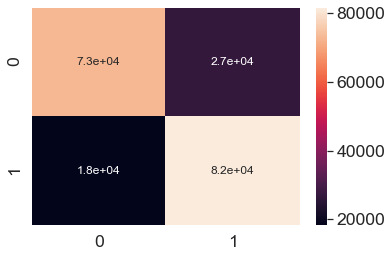

In [67]:
def best_equation(row):
    x0, x1, x2, x3 = row
    Y = math.sin((x1 + math.sin(x0 + (4.9301405 * x1))) + math.sin(3.7461374 * x1))
    
#     Y = sqrt_abs(x0)
    
#     Y = (math.erf(log1p_abs(x1)) + \
#          math.atan(math.erfc(math.asinh(greater(math.atan(cube(pow(atanh_clip(math.erf(x2)), 
#                                                                    math.erf(math.erf(x1 + x2))))), x0)))))

    return abs(Y)

row = np.array([2.39e-01, 2.00e-02, 0, 0])
best_equation(row)


# print(np.apply_along_axis(best_equation, 1, X_nor_np))
estimated = np.apply_along_axis(best_equation, 1, X_nor_np)
estimated_round = np.round(estimated)


confusion_matrix_val = confusion_matrix(Y_nor_np_flat, estimated_round)
print(confusion_matrix(Y_nor_np_flat, estimated_round).ravel())

# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(Y_nor_np_flat, estimated_round).ravel()
Accuracy = (tp + tn) / (tp + tn + fp + fn)
Precision = tp / (tp + fp)
Recall = tp / (tp + fn)

print('accuracy_score = ', accuracy_score(Y_nor_np_flat, estimated_round))
print('Precision = ', Precision)
print('Recall = ', Recall)

array = confusion_matrix_val

df_cm = pd.DataFrame(array, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.6) # for label size
sns.heatmap(df_cm, annot=True, 
            annot_kws={"size": 12}) # font size

plt.show()

In [ ]:
# %%time
# # learn equation
# equation = pysr(X_nor_np,
#                 Y_nor_np_flat,
#                 niterations=100,
#                 binary_operators=["plus", "sub", "mult", "pow", "div", "greater", "mod", "logical_or", "logical_and"],
#                 unary_operators=["neg", "square", "cube", "exp", "abs", "log_abs",
#                                  "log10_abs", "log2_abs", "log1p_abs", "sqrt_abs",
#                                  "sin", "cos", "tan", "sinh", "cosh", "tanh",
#                                  "atan", "asinh", "acosh_abs", "atanh_clip",
#                                  "erf", "erfc", "gamma", "relu", "round", "floor", "ceil", "round", "sign"])